<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

# **Artificial Intelligence - MSc**
## ET5003 - MACHINE LEARNING APPLICATIONS 

### Instructor: Enrique Naredo
### ET5003_Etivity-2

In [1]:
#@title Current Date
Today = '2021-09-22' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "" #@param {type:"string"}
Student_full_name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Example' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Task: 

You have to create a  piecewise regression model following the guidelines from the notebook provided to predict the house price using the provided dataset in the GitHub repository.

1. Get the dataset: train, test, and true price.

2. Analyse the dataset and decide what features to use.

3. Clean the dataset: remove nan's and possible outliers.

4. You could remove registers with 0 bathrooms and 0 bedrooms.

5. Your goal is to use a piecewise regression to solve this problem.

6. Follow the guidelines from the example provided.

7. Apply a full model first as a baseline.

8. You could select longitude and latitude to create clusters.

9. Use the number of clusters you model returns.

10. Apply a model to each cluster.

11. Analyse the results and give a comparison from both approaches

12. You could split the training to get a validation dataset.

13. Take notes from all the experiment results and bring your insights in your summary.

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

In [7]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Specifying the Google Drive path which contains the dataset
Path = '/content/drive/MyDrive/Colab Notebooks/Enrique/Data/etivity_2/'

# training dataset: 
training_file = Path + "house_train.csv"
# test dataset: 
testing_file = Path + "house_test.csv"
# cost dataset:
cost_file = Path + "true_price.csv"

In [10]:
df_train =pd.read_csv(training_file)
df_test =pd.read_csv(testing_file)
df_cost =pd.read_csv(cost_file)

### Train dataset

In [11]:
# show first data frame rows 
df_train.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [12]:
# Generate descriptive statistics
df_train.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


### Test dataset

In [13]:
# show first data frame rows 
df_test.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [14]:
# Generate descriptive statistics
df_test.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


### Expected Cost dataset

In [15]:
# show first data frame rows 
df_cost.head()

,Id,Expected
0,12373510,875000.0
1,12422623,355000.0
2,12377408,440000.0
3,12420093,425000.0
4,12417338,265000.0


In [16]:
# Generate descriptive statistics
df_cost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


Renaming the Expected column to Price

In [17]:
# Change the 'Expected' column to the "Price"
df_cost = df_cost.rename(columns={"Expected": "price"})

### Combining the cost/price with the test data

The training data already has the price which is the target of the predictors. The cost dataframe will now be combined with the test dataframe by means of a one-to-one mapping between the ad_id field and the Id field of the cost dataframe. 

In [18]:
#add the price column to the test dataset
df_test = pd.merge(df_test, df_cost, left_on='ad_id', right_on='Id')

df_test.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface,Id,price
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000,5.000000e+02,5.000000e+02
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671,1.231695e+07,5.810356e+05
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362,1.485832e+05,6.009194e+05
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000,1.130615e+07,8.500000e+04
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000,1.228617e+07,2.950000e+05
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000,1.237964e+07,4.250000e+05
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000,1.240544e+07,5.950000e+05
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120,1.242809e+07,5.750000e+06


### Data cleaning

In [19]:
df_train.isnull().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

In [20]:
df_train = df_train.dropna(subset=['price'])

In [21]:
df_train['price'].isnull().sum()

0

In [22]:
zero_bathrooms_filter = df_train['bathrooms']==0
zero_beds_filter = df_train['beds']==0

print("Number of properties with 0 bathrooms:", df_train[zero_bathrooms_filter]['ad_id'].count())
print("Number of properties with 0 beds:", df_train[zero_beds_filter]['ad_id'].count())

# Dropping rows with zero bathrooms or bedrooms
df_train.drop(df_train[(zero_bathrooms_filter) | (zero_beds_filter)].index, inplace=True)

print("Number of properties with 0 bathrooms post drop:", df_train[zero_bathrooms_filter]['ad_id'].count())
print("Number of properties with 0 beds post drop:", df_train[zero_beds_filter]['ad_id'].count())

Number of properties with 0 bathrooms: 63
Number of properties with 0 beds: 48
Number of properties with 0 bathrooms post drop: 0
Number of properties with 0 beds post drop: 0


Outliers

In [23]:
# Extract the properties with a longitude outside of the Dublin
long = (df_train['longitude']>-6) | (df_train['longitude']<-7)

# Extract the properties with a latitude outside of dublin
lat = (df_train['latitude']>54) | (df_train['latitude']<53)

# Select all cases where the location falls outside Dublin
df_train[long | lat]

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
767,12270559,Clondalkin,1.0,3.0,NaN,Dublin,RAY COOKE AUCTIONEERS take great pleasure in i...,prod,NaN,None,52.501856,-1.744995,NaN,199000.0,sale,semi-detached,79.0
861,12283542,Glenageary,2.0,4.0,F,Dublin,LEONARD WILSON KEENAN ESTATE &amp; LETTING AGE...,prod,NaN,None,51.458439,-2.496219,NaN,795000.0,sale,semi-detached,NaN


In [24]:
df_train.drop((df_train.loc[long & lat]).index, inplace=True)

### Heat map of the log prices across Dublin

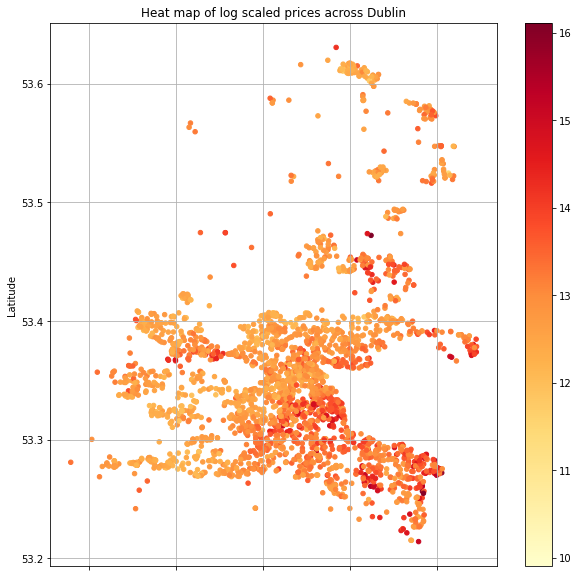

In [25]:
# Log transforming the price to remove heat map sensitivity to outliers
df_train.plot.scatter(x = 'longitude', y = 'latitude', c = np.log(df_train['price']), cmap = 'YlOrRd', figsize = (10,10))
plt.title("Heat map of log scaled prices across Dublin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

Test data

Outliers

In [26]:
# Create variables with conditions for longitude and latitude
long = (df_test['longitude']>-6) | (df_test['longitude']<-7)
lat = (df_test['latitude']>54) | (df_test['latitude']<53)

# Select all cases where the location falls outside Dublin
df_test[long | lat]

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface,Id,price


In [27]:
df_test[df_test.duplicated()]

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface,Id,price


In [28]:
df_train[df_train.duplicated(subset = ['latitude','longitude','price','surface'], keep = False)].sort_values(by = ['latitude'])


,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2816,12423999,Rathfarnham,2.0,2.0,C3,Dublin,Ideally located at the foot of the Dublin Moun...,prod,NaN,Spacious Two Bedroom Apartment \nGround Floor\...,53.270473,-6.254180,NaN,295000.0,sale,apartment,66.00
1374,12371113,Rathfarnham,2.0,2.0,C3,Dublin,Ideally located at the foot of the Dublin Moun...,prod,NaN,Spacious Two Bedroom Apartment \nGround Floor\...,53.270473,-6.254180,NaN,295000.0,sale,apartment,66.00
1675,12383142,Blackrock,3.0,5.0,C1,Dublin,An impressive three-story family home superbly...,prod,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,NaN,795000.0,sale,detached,175.96
2119,12395491,Blackrock,3.0,5.0,C1,Dublin,An impressive three-story family home superbly...,prod,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,NaN,795000.0,sale,detached,175.96
2654,12417617,Blackrock,2.0,2.0,C3,Dublin,"Apt. 38, Seamount Apartments, Booterstown, Co....",prod,Parking,None,53.307339,-6.203063,NaN,395000.0,sale,apartment,73.00
2652,12417605,Booterstown,2.0,2.0,C3,Dublin,"Apt. 38, Seamount Apartments, Booterstown, Co....",prod,Gas Fired Central Heating,None,53.307339,-6.203063,NaN,395000.0,sale,apartment,73.00
2645,12417464,Drimnagh,2.0,3.0,E2,Dublin,Castle Estate Agents powered by Keller William...,prod,NaN,None,53.330462,-6.328344,NaN,249950.0,sale,terraced,NaN
2303,12405509,Drimnagh,2.0,3.0,E2,Dublin,Castle Estate Agents powered by Keller William...,prod,NaN,None,53.330462,-6.328344,NaN,249950.0,sale,terraced,NaN
2925,12426533,Dublin 8,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.00
2978,12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.00


In [29]:
df_test[df_test.duplicated(subset = ['latitude','longitude','price','surface'], keep = False)].sort_values(by = ['latitude'])


,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface,Id,price


In [30]:
# Capture counts before duplicate removal
count_pre_removal = df_train['ad_id'].count()

# Remove duplicates
df_train = df_train.drop_duplicates(subset = ['latitude','longitude','price','surface'])

# Print difference in count post duplicates removal
print("Number of duplicates removed: ", count_pre_removal - df_train['ad_id'].count())

Number of duplicates removed:  18


Missing Surface Values

In [31]:
print("Number of missing surface values: ", df_train['surface'].isna().sum())

Number of missing surface values:  474


In [32]:
# Determine the properties with a surface outlier lower than 20 and above 10000
s = (df_train['surface'] < 20) | (df_train['surface'] > 10000)

# Show cases where the surface < 20 and surface > 10000
df_train[s]

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
88,11675753,Swords,1.0,4.0,E1,Dublin,Thornton Park is a superb modern equestrian ce...,prod,NaN,None,53.474502,-6.343483,NaN,1100000.0,sale,bungalow,72236.38714
1733,12384756,Dublin 7,1.0,1.0,NaN,Dublin,Gillespie Lowe are delighted to present this o...,prod,NaN,"Central location,\nFirst floor,\nLifts,\nWell ...",53.356068,-6.265947,NaN,200000.0,sale,apartment,3.40000
2300,12405492,Drumcondra,1.0,1.0,NaN,Dublin,Ecopods brought to you by CDC Estate Agents ha...,prod,NaN,Fully galvanised structure and roof for long l...,53.369627,-6.247286,NaN,19995.0,sale,apartment,18.60000


In [33]:
df_train.loc[s, 'surface'] = np.NaN

In [34]:
# imputing the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

X = df_train[['bathrooms','beds','longitude','latitude','surface']].values
a = imp.fit_transform(X)

In [35]:
df_train['surface'] = a[:,4]

In [36]:
print("Property examples with no surface values post imputation: ", df_train['surface'].isna().sum())

Property examples with no surface values post imputation:  0


In [37]:
df_train.apply(lambda x: sum(x.isnull()), axis=0)

ad_id                    0
area                     0
bathrooms                0
beds                     0
ber_classification     556
county                   0
description_block        0
environment              0
facility              1865
features                 0
latitude                 0
longitude                0
no_of_units           2801
price                    0
property_category        0
property_type            0
surface                  0
dtype: int64

In [38]:
df_train.drop('ad_id', axis=1, inplace=True)
df_train.drop('county', axis=1, inplace=True)
df_train.drop('area', axis=1, inplace=True)
df_train.drop('description_block', axis=1, inplace=True)
df_train.drop('environment', axis=1, inplace=True)
df_train.drop('facility', axis=1, inplace=True)
df_train.drop('features', axis=1, inplace=True)
df_train.drop('ber_classification', axis=1, inplace=True)


# Removing no_of_units as there are many missing values
df_train.drop('no_of_units', axis=1, inplace=True)

In [39]:
property_category_mapper = {}
for id, val in enumerate(df_train['property_category'].unique()):
    property_category_mapper[val] = id 
    
print("property_category_mapper", property_category_mapper)
df_train['property_category'].replace(property_category_mapper, inplace=True)

property_category_mapper {'new_development_parent': 0, 'sale': 1}


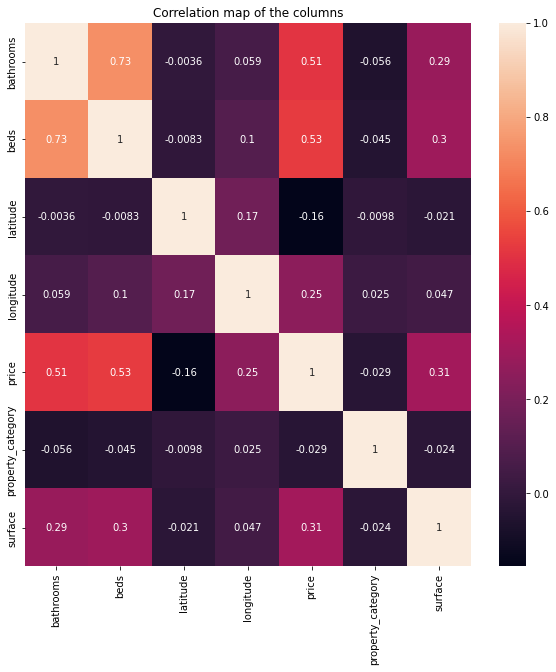

In [40]:
plt.figure(figsize=(10, 10))
plt.title("Correlation map of the columns")
sns.heatmap(df_train.corr(), annot=True);

In [41]:
df_train

,bathrooms,beds,latitude,longitude,price,property_category,property_type,surface
15,3.0,5.0,53.400454,-6.445730,935000.0,0,detached,321.0
26,4.0,4.0,53.316410,-6.385214,485000.0,0,semi-detached,144.0
27,3.0,5.0,53.401414,-6.446634,935000.0,0,detached,321.0
35,5.0,5.0,53.375377,-6.056749,1475000.0,0,detached,312.0
38,2.0,2.0,53.372130,-6.338466,410000.0,0,apartment,83.0
...,...,...,...,...,...,...,...,...
2976,1.0,2.0,53.353428,-6.282528,290000.0,1,terraced,42.0
2977,2.0,2.0,53.338738,-6.237199,415000.0,1,apartment,56.0
2979,1.0,2.0,53.346098,-6.276856,299000.0,1,apartment,55.6
2980,2.0,3.0,53.273518,-6.178500,495000.0,1,end-of-terrace,97.0


### One hot encoding

In [42]:
# One hot encoding the property type
df_train = pd.get_dummies(df_train, columns=['property_type'], drop_first=True)

In [43]:
df_train

,bathrooms,beds,latitude,longitude,price,property_category,surface,property_type_bungalow,property_type_detached,property_type_duplex,property_type_end-of-terrace,property_type_semi-detached,property_type_site,property_type_studio,property_type_terraced,property_type_townhouse
15,3.0,5.0,53.400454,-6.445730,935000.0,0,321.0,0,1,0,0,0,0,0,0,0
26,4.0,4.0,53.316410,-6.385214,485000.0,0,144.0,0,0,0,0,1,0,0,0,0
27,3.0,5.0,53.401414,-6.446634,935000.0,0,321.0,0,1,0,0,0,0,0,0,0
35,5.0,5.0,53.375377,-6.056749,1475000.0,0,312.0,0,1,0,0,0,0,0,0,0
38,2.0,2.0,53.372130,-6.338466,410000.0,0,83.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,1.0,2.0,53.353428,-6.282528,290000.0,1,42.0,0,0,0,0,0,0,0,1,0
2977,2.0,2.0,53.338738,-6.237199,415000.0,1,56.0,0,0,0,0,0,0,0,0,0
2979,1.0,2.0,53.346098,-6.276856,299000.0,1,55.6,0,0,0,0,0,0,0,0,0
2980,2.0,3.0,53.273518,-6.178500,495000.0,1,97.0,0,0,0,1,0,0,0,0,0


In [44]:
def plot_distributions(fig, column, x, y, z, df, bins=20):
    # Box Plot
    ax1 = fig.add_subplot(x, y, z)
    ax1.set_title(f"Boxplot of the {column} attribute")
    ax1.set_ylabel(column)
    df.boxplot(column=[column])
    
    # Histogram
    ax2 = fig.add_subplot(x, y, z+1)
    ax2.set_title(f"Histogram of the {column} attribute")
    ax2.set_xlabel(column)
    ax2.set_ylabel(f'Number of {column}')
    df[column].hist(bins=20) 

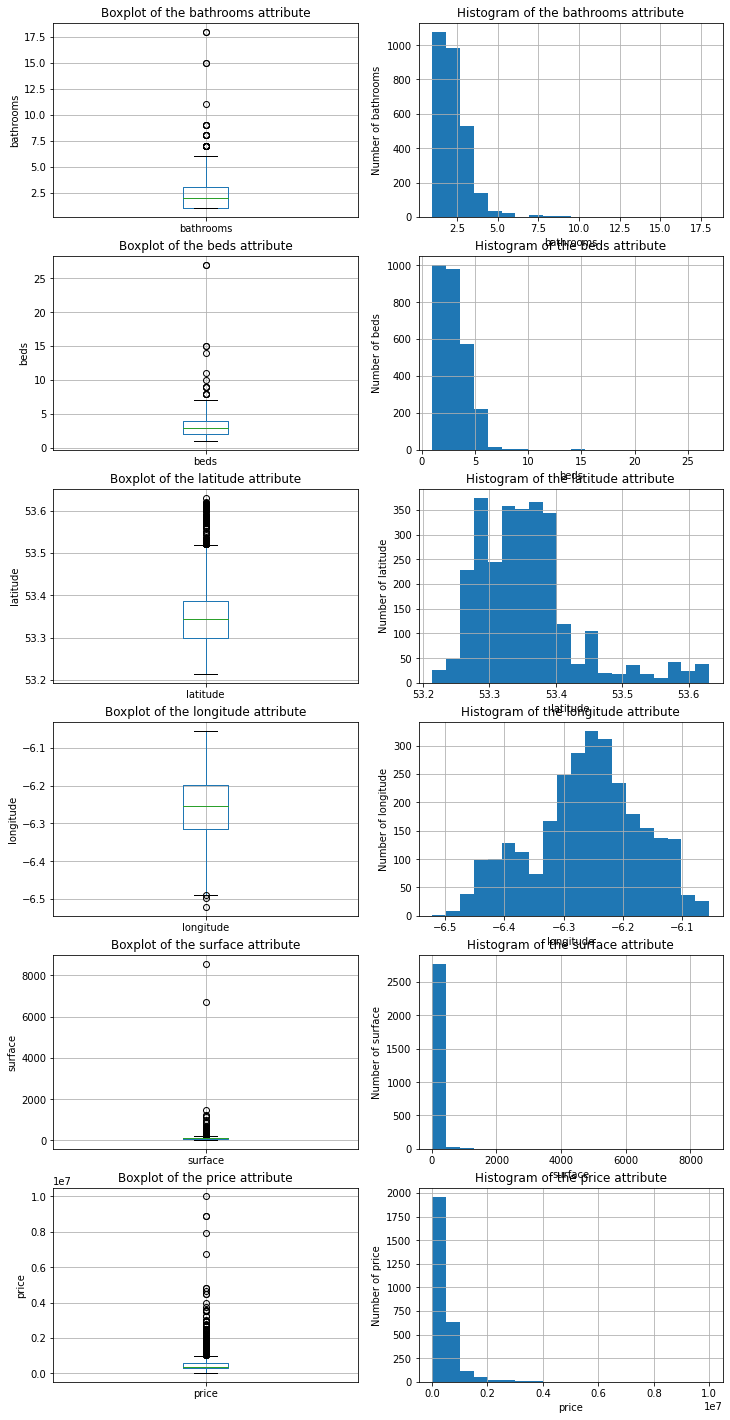

In [45]:
fig = plt.figure(figsize=(12, 25))
plot_distributions(fig, "bathrooms", 6, 2, 1, df_train)
plot_distributions(fig, "beds", 6, 2, 3, df_train)
plot_distributions(fig, "latitude", 6, 2, 5, df_train)
plot_distributions(fig, "longitude", 6, 2, 7, df_train)
plot_distributions(fig, "surface", 6, 2, 9, df_train)
plot_distributions(fig, "price", 6, 2, 11, df_train)

In [46]:
df_train['bathrooms'] = np.log(df_train['bathrooms'])
df_train['beds'] = np.log(df_train['beds'])
# df_train['price'] = np.log(df_train['price'])


In [47]:
df_train['surface'] = np.log(df_train['surface'])

standard_scaler_lat_long = StandardScaler()
standard_scaler_lat_long.fit(df_train[['latitude', 'longitude']])
df_train[['latitude', 'longitude']] = standard_scaler_lat_long.transform(df_train[['latitude', 'longitude']])

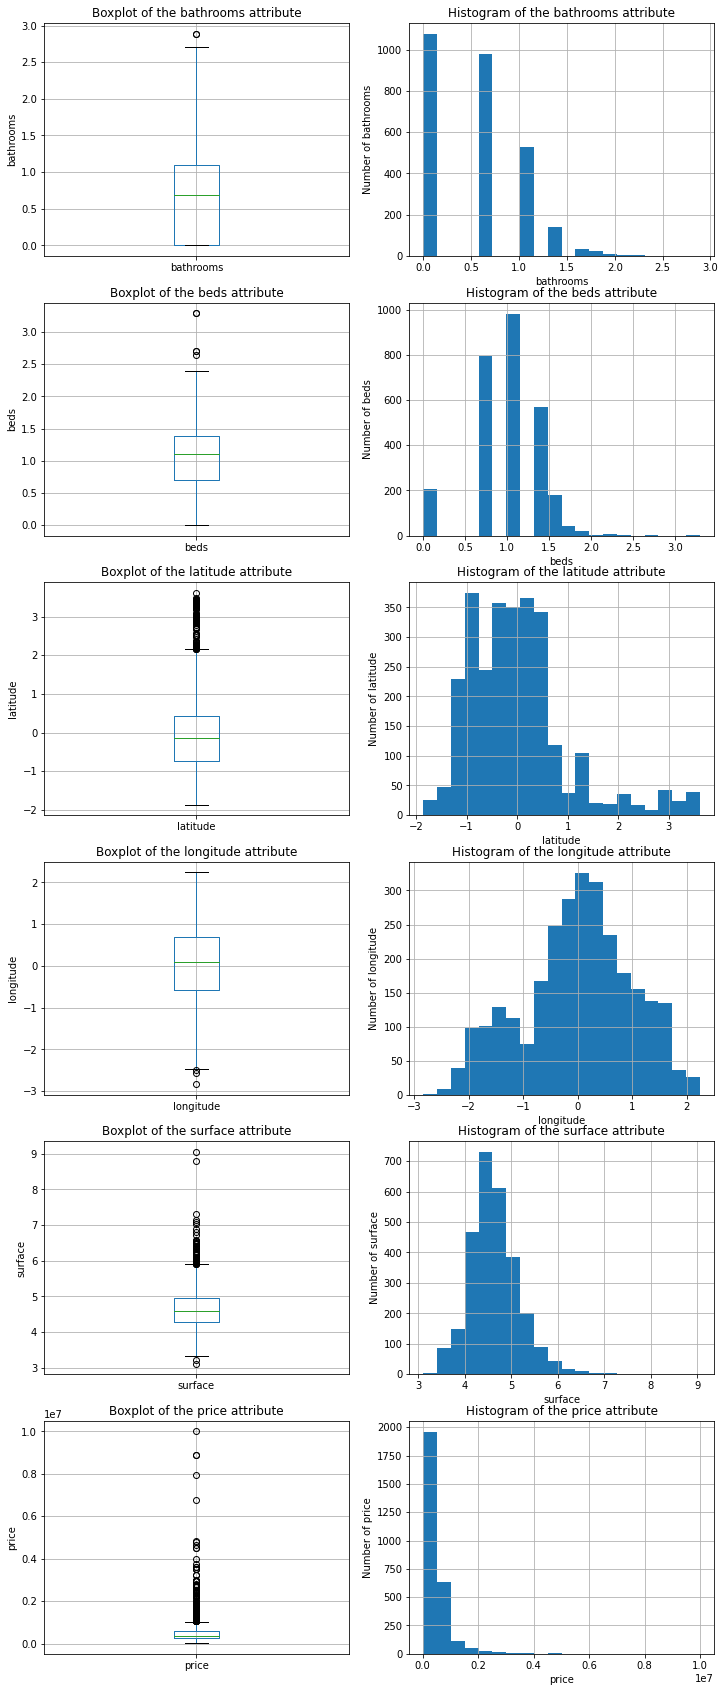

In [48]:
fig = plt.figure(figsize=(12, 30))
plot_distributions(fig, "bathrooms", 6, 2, 1, df_train)
plot_distributions(fig, "beds", 6, 2, 3, df_train)
plot_distributions(fig, "latitude", 6, 2, 5, df_train)
plot_distributions(fig, "longitude", 6, 2, 7, df_train)
plot_distributions(fig, "surface", 6, 2, 9, df_train)
plot_distributions(fig, "price", 6, 2, 11, df_train)

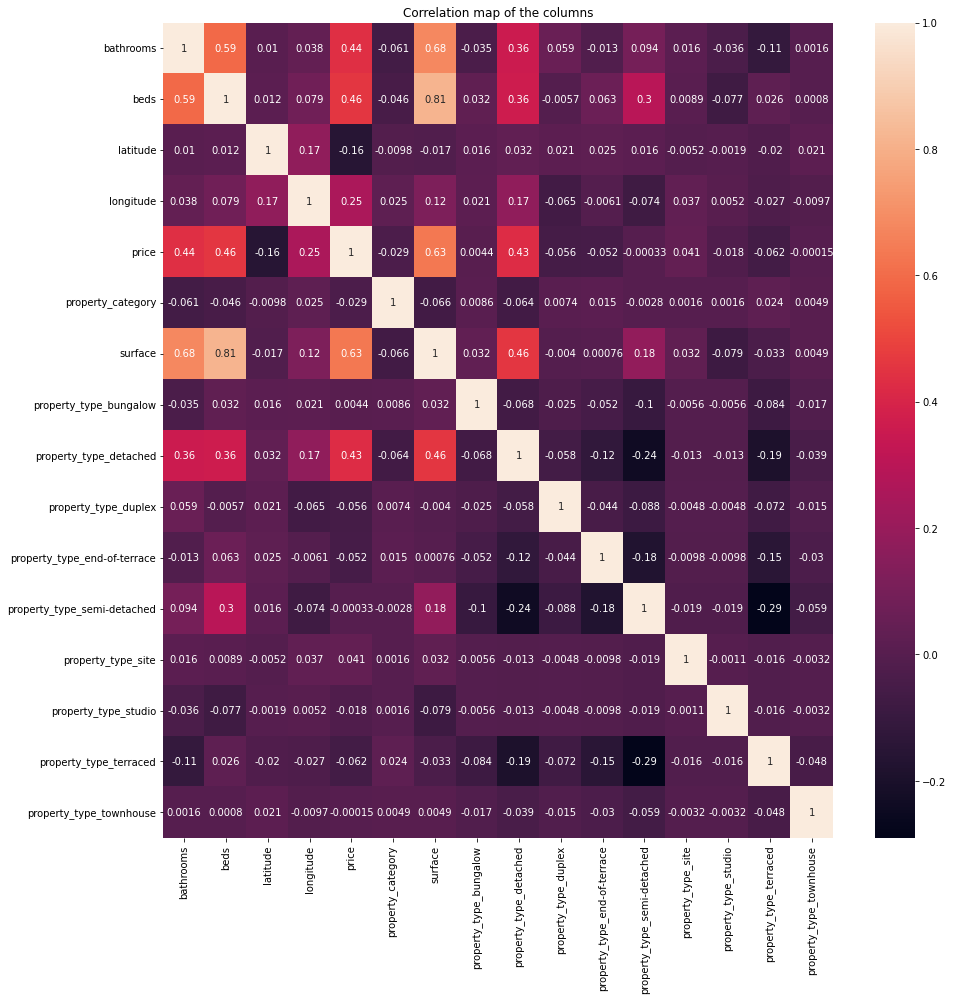

In [49]:
plt.figure(figsize=(15, 15))
plt.title("Correlation map of the columns")
sns.heatmap(df_train.corr(), annot=True);

Features showing string correlation:
- property_type_detached
- surface
- longitude
- latitude
- beds
- bathrooms

In [50]:
df_test = pd.get_dummies(df_test, columns=['property_type'], drop_first=True)
df_test['surface'] = np.log(df_test['surface'])

df_test[['latitude', 'longitude']] = standard_scaler_lat_long.transform(df_test[['latitude', 'longitude']])
df_test['beds'] = np.log(df_test['beds'])
df_test['bathrooms'] = np.log(df_test['bathrooms'])
# df_test['price'] = np.log(df_test['price'])


In [51]:
# # split data into training and test
# from sklearn.model_selection import train_test_split

# # training: 70% (0.7), test: 30% (0.3) 
# # you could try any other combination 
# # but consider 50% of training as the low boundary
# X_train, X_test, y_train, y_test = train_test_split(df_train.drop('price', axis=1).values, df_train['price'], test_size=0.3)

# PIECEWISE REGRESSION

## Full Model

In [52]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['longitude', 'latitude', 'property_type_detached','surface', 'beds', 'bathrooms', 'price']
# dropna: remove missing values
df_subset_train = df_train[featrain].dropna(axis=0)

featest = ['longitude', 'latitude', 'property_type_detached','surface', 'beds', 'bathrooms']
df_subset_test  =  df_test[featest].dropna(axis=0)

# cost
df_cost = df_test[df_cost.index.isin(df_subset_test.index)]

In [53]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [54]:
# train set, input columns
Xn_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xn_test = df_subset_test.iloc[:,0:].values 
# test set, output column, cost
y_test = df_cost.price.values

In [55]:
# # StandardScaler() will normalize the features i.e. each column of X, 
# # so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

# Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
# xscaler = sc.fit(Xss_train)
# Xn_train = xscaler.transform(Xss_train)

# Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
# Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [56]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 2,371.2


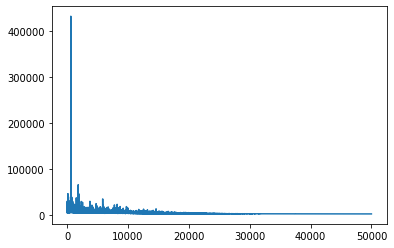

In [57]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [58]:
# samples from the posterior
posterior = approximation.sample(5000)

In [59]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  194495.9784002618
MAPE =  0.26531196289691045


## Clustering

### Full Model

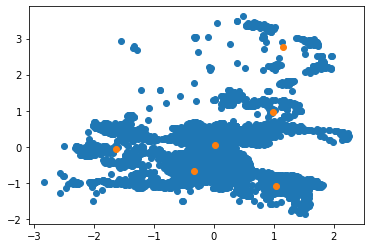

In [60]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
# clustering by features 1, 2
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

### Clusters

In [61]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 398, 1: 1005, 2: 276, 3: 499, 4: 451, 5: 179}

In [62]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 84, 1: 173, 2: 43, 3: 100, 4: 56, 5: 44}

In [63]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [64]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [65]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [66]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [67]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

In [68]:
# cluster 5
Xn5 = Xn_train[clusters_train==5,:]
Xtestn5 = Xn_test[clusters_test==5,:]
ylog5 = np.log(ys_train.astype('float')[clusters_train==5,:])
yscaler5 = StandardScaler().fit(ylog5)
yn5 = yscaler5.transform(ylog5)

## Piecewise Model

In [69]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 370.06


In [70]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 834.59


In [71]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 285.55


In [72]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 396.36


In [73]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 449.03


In [74]:
# model_5
with pm.Model() as model5:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn5.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn5[:,0])
    
with model5:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior5 = approximation.sample(5000)

Finished [100%]: Average Loss = 235.43


In [75]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



##Simulations

### Only Cluster 0

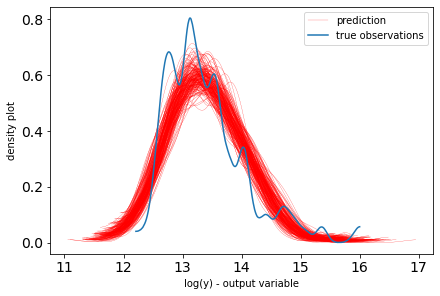

In [76]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

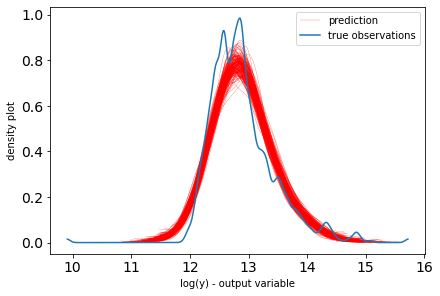

In [77]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

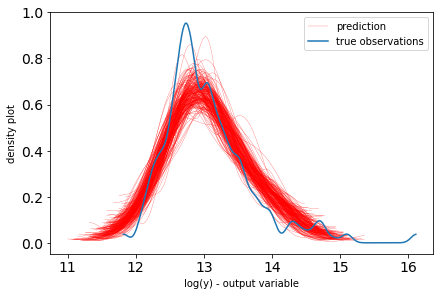

In [78]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

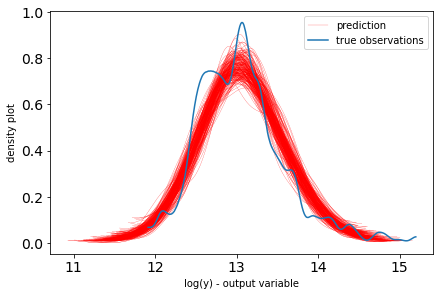

In [79]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

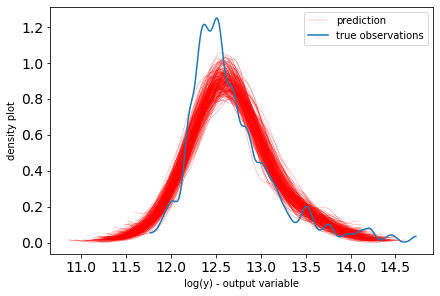

In [80]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

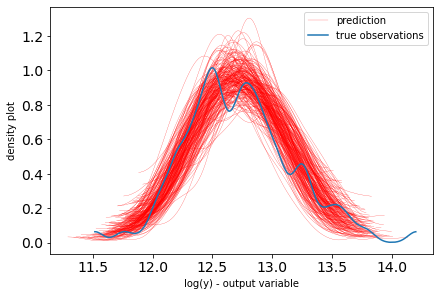

In [81]:
#Simulation
Ypred5 = yscaler5.inverse_transform(ppc(posterior5['alpha'],posterior5['beta'],posterior3['sigma_n'],Xn5,  nsamples=200))
for i in range(Ypred5.shape[0]):
    az.plot_dist( Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog5,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

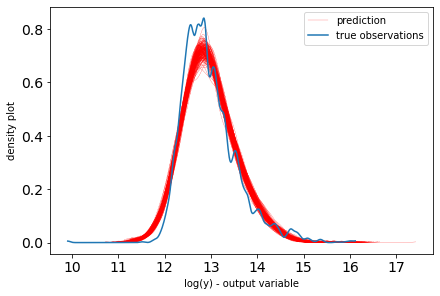

In [82]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200)


# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 ])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0, ylog1, ylog2, ylog3, ylog4, ylog5])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [83]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))
print("MAPE Cluster0= ",(np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0])))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))
print("MAPE Cluster1= ",(np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))
print("MAPE Cluster2= ",(np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))
print("MAPE Cluster3= ",(np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3])))

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]))))
print("MAPE Cluster4= ",(np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4])))

# cluster 5
y_pred_BLR5 = np.exp(yscaler5.inverse_transform(np.mean(posterior5['alpha']) 
              + np.dot(np.mean(posterior5['beta'],axis=0), Xtestn5.T)))
print("Size Cluster5", np.sum(clusters_test==5), ", MAE Cluster5=",
      (np.mean(abs(y_pred_BLR5 - y_test[clusters_test==5]))))
print("MAPE Cluster5= ",(np.mean(abs(y_pred_BLR5 - y_test[clusters_test==5]) /y_test[clusters_test==5])))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3]),
                 abs(y_pred_BLR4 - y_test[clusters_test==4]),
                 abs(y_pred_BLR5 - y_test[clusters_test==5])])

# MAE
print("MAE=",np.mean(joint))

Size Cluster0 84 , MAE Cluster0= 246420.2760833504
MAPE Cluster0=  0.2503346213514773
Size Cluster1 173 , MAE Cluster1= 161149.30211534072
MAPE Cluster1=  0.2376517910672726
Size Cluster2 43 , MAE Cluster2= 188986.55428960384
MAPE Cluster2=  0.30919901337005185
Size Cluster3 100 , MAE Cluster3= 225055.7004569732
MAPE Cluster3=  0.21708860631535498
Size Cluster4 56 , MAE Cluster4= 126995.3397748357
MAPE Cluster4=  0.26414128770015577
Size Cluster5 44 , MAE Cluster5= 103572.28983211903
MAPE Cluster5=  0.28810870772165503
MAE= 181758.08823421944


### PPC on the Test set



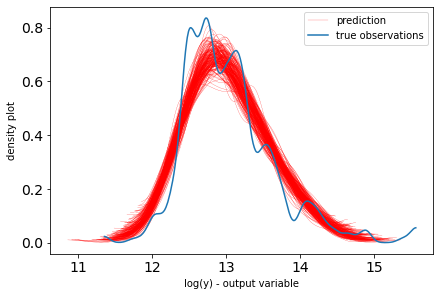

In [84]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4, nsamples=num_samples2)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xtestn5, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# SUMMARY